### Objectif

<ol>
    <li>Etudier la répartition des NA associées aux variables 'FIRE CODE' et 'FIRE NAME'</li>
    <li>Etudier la répartition des NA associées aux variables 'CONT_DATE' et 'CONT_DOY'</li>
</ol>

### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Chagement du jeu de données

In [2]:
engine = db.create_engine('sqlite:///FPA_FOD_20170508.sqlite')
connection = engine.connect()
metadata = db.MetaData()
Fires = pd.read_sql_query("SELECT * FROM fires", con = connection)

In [3]:
Fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

### Travail sur la variable 'FIRE CODE'

Vérification de la répartition des valeurs Fire Code NA par taille de feux

In [4]:
Fires_code = Fires[['FIRE_SIZE_CLASS', 'FIRE_CODE']]

In [5]:
FIRE_CODE_ind = np.where(Fires_code.FIRE_CODE.isna(), 1, 0)

In [6]:
FIRE_CODE_ind = pd.Series(FIRE_CODE_ind)

In [7]:
Fires_code['FIRE_CODE_ind'] = FIRE_CODE_ind

C:\Users\GTHC0100\AppData\Local\Temp\1/ipykernel_19252/3905042824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_code['FIRE_CODE_ind'] = FIRE_CODE_ind


In [8]:
Fires_code_groupby = Fires_code.groupby('FIRE_SIZE_CLASS').agg({'FIRE_CODE':'count', 'FIRE_CODE_ind':'sum'})
Fires_code_groupby

,FIRE_CODE,FIRE_CODE_ind
FIRE_SIZE_CLASS,,
A,173771,493148
B,103285,836091
C,27617,192460
D,7603,20824
E,5558,8549
F,4271,3515
G,2724,1049


In [9]:
Fires_code_groupby.rename({'FIRE_CODE':'Nb FIRE_CODE valides', 'FIRE_CODE_ind':'Nb FIRE_CODE nan'}, axis = 1, inplace = True)

In [10]:
Fires_code_groupby['Nb FIRE_CODE nan'] = Fires_code_groupby['Nb FIRE_CODE nan'].astype('int64')

In [11]:
Fires_code_groupby.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Nb FIRE_CODE valides  7 non-null      int64
 1   Nb FIRE_CODE nan      7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [12]:
Fires_code_groupby['Nb FIRE_CODE total'] = Fires_code_groupby['Nb FIRE_CODE valides'] + Fires_code_groupby['Nb FIRE_CODE nan']

In [13]:
Fires_code_groupby

,Nb FIRE_CODE valides,Nb FIRE_CODE nan,Nb FIRE_CODE total
FIRE_SIZE_CLASS,,,
A,173771,493148,666919
B,103285,836091,939376
C,27617,192460,220077
D,7603,20824,28427
E,5558,8549,14107
F,4271,3515,7786
G,2724,1049,3773


In [14]:
Fires_code_groupby['Ratio FIRE_CODE nan'] = np.round(Fires_code_groupby['Nb FIRE_CODE nan']/Fires_code_groupby['Nb FIRE_CODE total'], 2)

In [15]:
Fires_code_groupby

,Nb FIRE_CODE valides,Nb FIRE_CODE nan,Nb FIRE_CODE total,Ratio FIRE_CODE nan
FIRE_SIZE_CLASS,,,,
A,173771,493148,666919,0.74
B,103285,836091,939376,0.89
C,27617,192460,220077,0.87
D,7603,20824,28427,0.73
E,5558,8549,14107,0.61
F,4271,3515,7786,0.45
G,2724,1049,3773,0.28


In [16]:
Fires_code_groupby.reset_index(inplace = True)

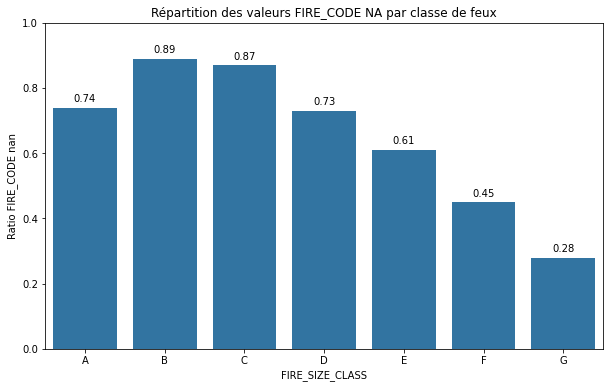

In [31]:
plt.figure(figsize = (10,6))
splot = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio FIRE_CODE nan', color = 'tab:blue', data = Fires_code_groupby)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs FIRE_CODE NA par classe de feux');

### Travail sur la variable 'FIRE NAME'

Vérification de la répartition des valeurs Fire Name NA par taille de feux

In [17]:
Fires_name = Fires[['FIRE_SIZE_CLASS', 'FIRE_NAME']]

In [18]:
FIRE_NAME_ind = np.where(Fires_name.FIRE_NAME.isna(), 1, 0)

In [19]:
FIRE_NAME_ind = pd.Series(FIRE_NAME_ind)

In [20]:
Fires_name['FIRE_NAME_ind'] = FIRE_NAME_ind

C:\Users\GTHC0100\AppData\Local\Temp\1/ipykernel_19252/3888196811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_name['FIRE_NAME_ind'] = FIRE_NAME_ind


In [21]:
Fires_name_groupby = Fires_name.groupby('FIRE_SIZE_CLASS').agg({'FIRE_NAME':'count', 'FIRE_NAME_ind':'sum'})
Fires_name_groupby

,FIRE_NAME,FIRE_NAME_ind
FIRE_SIZE_CLASS,,
A,395314,271605
B,399295,540081
C,88621,131456
D,18368,10059
E,10998,3109
F,7004,782
G,3676,97


In [22]:
Fires_name_groupby.rename({'FIRE_NAME':'Nb FIRE_NAME valides', 'FIRE_NAME_ind':'Nb FIRE_NAME nan'}, axis = 1, inplace = True)

In [23]:
Fires_name_groupby['Nb FIRE_NAME nan'] = Fires_name_groupby['Nb FIRE_NAME nan'].astype('int64')

In [24]:
Fires_name_groupby.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Nb FIRE_NAME valides  7 non-null      int64
 1   Nb FIRE_NAME nan      7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [25]:
Fires_name_groupby['Nb FIRE_NAME total'] = Fires_name_groupby['Nb FIRE_NAME valides'] + Fires_name_groupby['Nb FIRE_NAME nan']

In [26]:
Fires_name_groupby

,Nb FIRE_NAME valides,Nb FIRE_NAME nan,Nb FIRE_NAME total
FIRE_SIZE_CLASS,,,
A,395314,271605,666919
B,399295,540081,939376
C,88621,131456,220077
D,18368,10059,28427
E,10998,3109,14107
F,7004,782,7786
G,3676,97,3773


In [27]:
Fires_name_groupby['Ratio FIRE_NAME nan'] = np.round(Fires_name_groupby['Nb FIRE_NAME nan']/Fires_name_groupby['Nb FIRE_NAME total'], 2)

In [28]:
Fires_name_groupby

,Nb FIRE_NAME valides,Nb FIRE_NAME nan,Nb FIRE_NAME total,Ratio FIRE_NAME nan
FIRE_SIZE_CLASS,,,,
A,395314,271605,666919,0.41
B,399295,540081,939376,0.57
C,88621,131456,220077,0.60
D,18368,10059,28427,0.35
E,10998,3109,14107,0.22
F,7004,782,7786,0.10
G,3676,97,3773,0.03


In [29]:
Fires_name_groupby.reset_index(inplace = True)

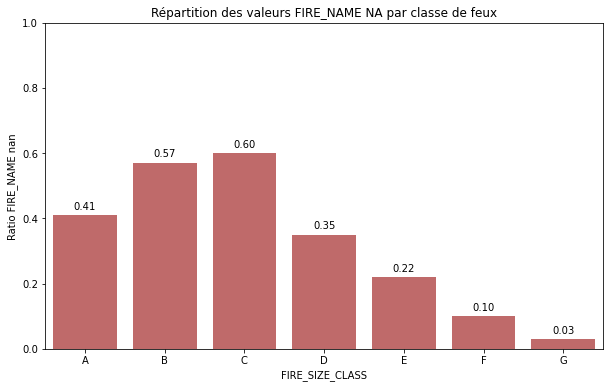

In [40]:
plt.figure(figsize = (10,6))
splot = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio FIRE_NAME nan', color = 'indianred', data = Fires_name_groupby)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs FIRE_NAME NA par classe de feux');

### Synthèse n°1

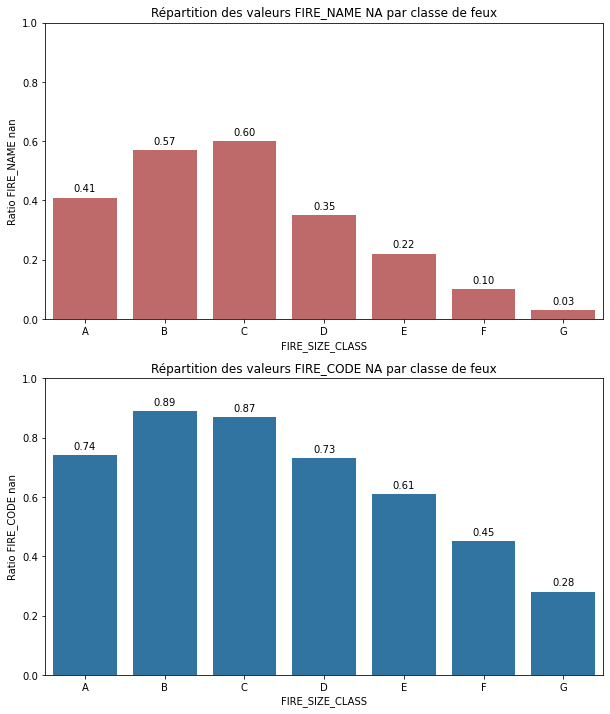

In [49]:
fig = plt.figure(figsize = (10,12))

plt.subplot(211)
splot1 = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio FIRE_NAME nan', color = 'indianred', data = Fires_name_groupby)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs FIRE_NAME NA par classe de feux')

plt.subplot(212)
splot2 = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio FIRE_CODE nan', color = 'tab:blue', data = Fires_code_groupby)
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs FIRE_CODE NA par classe de feux');

### Travail sur la variable 'CONT_DATE'

Vérification de la répartition des valeurs CONT_DATE NA par taille de feux

In [51]:
Fires_cont_date = Fires[['FIRE_SIZE_CLASS', 'CONT_DATE']]

In [52]:
CONT_DATE_ind = np.where(Fires_cont_date.CONT_DATE.isna(), 1, 0)

In [53]:
CONT_DATE_ind = pd.Series(CONT_DATE_ind)

In [54]:
Fires_cont_date['CONT_DATE_ind'] = CONT_DATE_ind

C:\Users\GTHC0100\AppData\Local\Temp\1/ipykernel_19252/2372262452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_cont_date['CONT_DATE_ind'] = CONT_DATE_ind


In [55]:
Fires_cont_date_groupby = Fires_cont_date.groupby('FIRE_SIZE_CLASS').agg({'CONT_DATE':'count', 'CONT_DATE_ind':'sum'})
Fires_cont_date_groupby

,CONT_DATE,CONT_DATE_ind
FIRE_SIZE_CLASS,,
A,421865,245054
B,429692,509684
C,103618,116459
D,15720,12707
E,9016,5091
F,5802,1984
G,3221,552


In [56]:
Fires_cont_date_groupby.rename({'CONT_DATE':'Nb CONT_DATE valides', 'CONT_DATE_ind':'Nb CONT_DATE nan'}, axis = 1, inplace = True)

In [57]:
Fires_cont_date_groupby['Nb CONT_DATE nan'] = Fires_cont_date_groupby['Nb CONT_DATE nan'].astype('int64')

In [58]:
Fires_cont_date_groupby.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Nb CONT_DATE valides  7 non-null      int64
 1   Nb CONT_DATE nan      7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [59]:
Fires_cont_date_groupby['Nb CONT_DATE total'] = Fires_cont_date_groupby['Nb CONT_DATE valides'] + Fires_cont_date_groupby['Nb CONT_DATE nan']

In [60]:
Fires_cont_date_groupby

,Nb CONT_DATE valides,Nb CONT_DATE nan,Nb CONT_DATE total
FIRE_SIZE_CLASS,,,
A,421865,245054,666919
B,429692,509684,939376
C,103618,116459,220077
D,15720,12707,28427
E,9016,5091,14107
F,5802,1984,7786
G,3221,552,3773


In [61]:
Fires_cont_date_groupby['Ratio CONT_DATE nan'] = np.round(Fires_cont_date_groupby['Nb CONT_DATE nan']/Fires_cont_date_groupby['Nb CONT_DATE total'], 2)

In [62]:
Fires_cont_date_groupby

,Nb CONT_DATE valides,Nb CONT_DATE nan,Nb CONT_DATE total,Ratio CONT_DATE nan
FIRE_SIZE_CLASS,,,,
A,421865,245054,666919,0.37
B,429692,509684,939376,0.54
C,103618,116459,220077,0.53
D,15720,12707,28427,0.45
E,9016,5091,14107,0.36
F,5802,1984,7786,0.25
G,3221,552,3773,0.15


In [63]:
Fires_cont_date_groupby.reset_index(inplace = True)

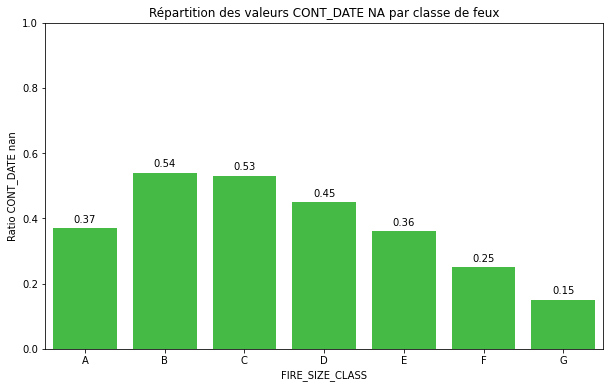

In [65]:
plt.figure(figsize = (10,6))
splot = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio CONT_DATE nan', color = 'limegreen', data = Fires_cont_date_groupby)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs CONT_DATE NA par classe de feux');

### Travail sur la variable 'CONT_DOY'

Vérification de la répartition des valeurs CONT_DOY NA par taille de feux

In [66]:
Fires_cont_doy = Fires[['FIRE_SIZE_CLASS', 'CONT_DOY']]

In [67]:
CONT_DOY_ind = np.where(Fires_cont_doy.CONT_DOY.isna(), 1, 0)

In [68]:
CONT_DOY_ind = pd.Series(CONT_DOY_ind)

In [69]:
Fires_cont_doy['CONT_DOY_ind'] = CONT_DOY_ind

C:\Users\GTHC0100\AppData\Local\Temp\1/ipykernel_19252/49065496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fires_cont_doy['CONT_DOY_ind'] = CONT_DOY_ind


In [70]:
Fires_cont_doy_groupby = Fires_cont_doy.groupby('FIRE_SIZE_CLASS').agg({'CONT_DOY':'count', 'CONT_DOY_ind':'sum'})
Fires_cont_doy_groupby

,CONT_DOY,CONT_DOY_ind
FIRE_SIZE_CLASS,,
A,421865,245054
B,429692,509684
C,103618,116459
D,15720,12707
E,9016,5091
F,5802,1984
G,3221,552


In [71]:
Fires_cont_doy_groupby.rename({'CONT_DOY':'Nb CONT_DOY valides', 'CONT_DOY_ind':'Nb CONT_DOY nan'}, axis = 1, inplace = True)

In [72]:
Fires_cont_doy_groupby['Nb CONT_DOY nan'] = Fires_cont_doy_groupby['Nb CONT_DOY nan'].astype('int64')

In [73]:
Fires_cont_doy_groupby.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Nb CONT_DOY valides  7 non-null      int64
 1   Nb CONT_DOY nan      7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes


In [74]:
Fires_cont_doy_groupby['Nb CONT_DOY total'] = Fires_cont_doy_groupby['Nb CONT_DOY valides'] + Fires_cont_doy_groupby['Nb CONT_DOY nan']

In [75]:
Fires_cont_doy_groupby

,Nb CONT_DOY valides,Nb CONT_DOY nan,Nb CONT_DOY total
FIRE_SIZE_CLASS,,,
A,421865,245054,666919
B,429692,509684,939376
C,103618,116459,220077
D,15720,12707,28427
E,9016,5091,14107
F,5802,1984,7786
G,3221,552,3773


In [76]:
Fires_cont_doy_groupby['Ratio CONT_DOY nan'] = np.round(Fires_cont_doy_groupby['Nb CONT_DOY nan']/Fires_cont_doy_groupby['Nb CONT_DOY total'], 2)

In [77]:
Fires_cont_doy_groupby

,Nb CONT_DOY valides,Nb CONT_DOY nan,Nb CONT_DOY total,Ratio CONT_DOY nan
FIRE_SIZE_CLASS,,,,
A,421865,245054,666919,0.37
B,429692,509684,939376,0.54
C,103618,116459,220077,0.53
D,15720,12707,28427,0.45
E,9016,5091,14107,0.36
F,5802,1984,7786,0.25
G,3221,552,3773,0.15


In [78]:
Fires_cont_doy_groupby.reset_index(inplace = True)

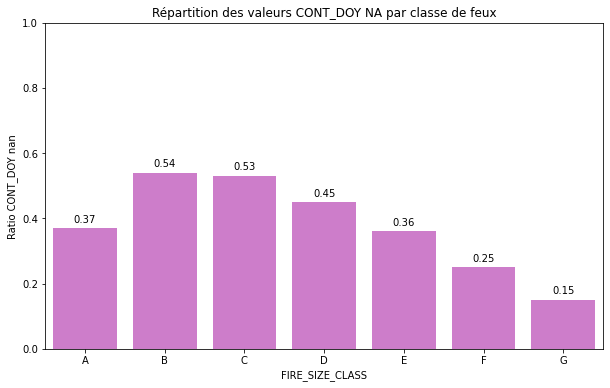

In [79]:
plt.figure(figsize = (10,6))
splot = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio CONT_DOY nan', color = 'orchid', data = Fires_cont_doy_groupby)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs CONT_DOY NA par classe de feux');

### Synthèse n°2

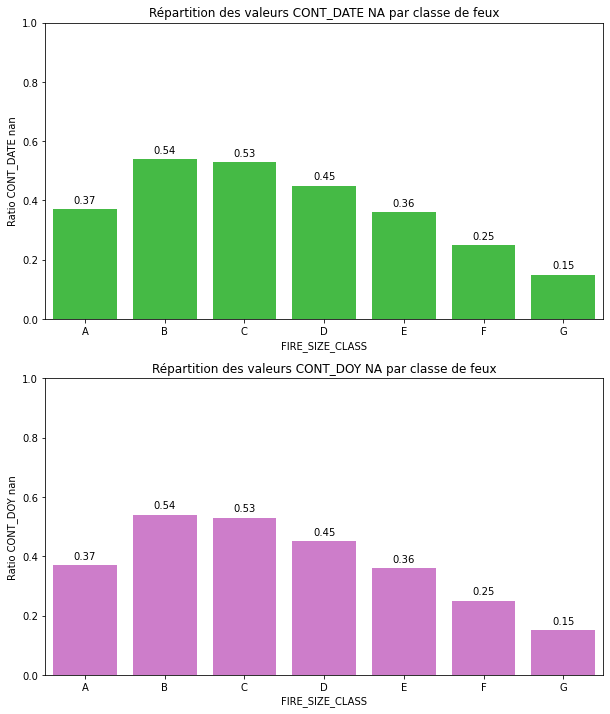

In [80]:
fig = plt.figure(figsize = (10,12))

plt.subplot(211)
splot = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio CONT_DATE nan', color = 'limegreen', data = Fires_cont_date_groupby)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs CONT_DATE NA par classe de feux')

plt.subplot(212)
splot = sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Ratio CONT_DOY nan', color = 'orchid', data = Fires_cont_doy_groupby)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0,1)
plt.title('Répartition des valeurs CONT_DOY NA par classe de feux');